# Handwriting Classification
This project explores classification learning using the MNIST dataset.

In [85]:
import pickle
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1 Loading Data

In [41]:
from sklearn.datasets import fetch_openml

# Fetch MNIST dataset using sklearn
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

## 2 Analysis

In [101]:
def print_digit(digit):
    # Sample a digit, reshaping the 1x784 array to 28x28
    digit_image = digit.reshape(28, 28)

    # Plot the thing
    plt.imshow(digit_image, cmap='binary')
    plt.axis('off')
    plt.show()

In [102]:
# Convert y from string type to numeric
y = y.astype(np.uint8)

# Separate test and training sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [17]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

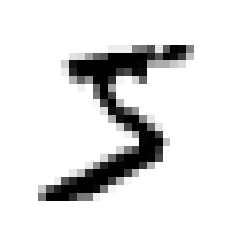

In [36]:
print_digit(X[0])

In [42]:
y[0]

5

In [51]:
# Target vectors for each set for value == 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

## 3 Modeling

In [62]:
# Stochastic Gradient Descent model for binary '5' classifier
from sklearn.linear_model import SGDClassifier

try:
    # Check for pickled model
    sgd_clf = pickle.load(open('pickles/sgd_clf.pkl', 'rb'))
except FileNotFoundError:
    # Create, train, and pickle the model if it does not exist
    sgd_clf = SGDClassifier(random_state=47)
    sgd_clf.fit(X_train, y_train_5)
    pickle.dump(sgd_clf, open('pickles/sgd_clf.pkl', 'wb'))

In [63]:
# 5 from above
sgd_clf.predict([X[0]])

array([ True])

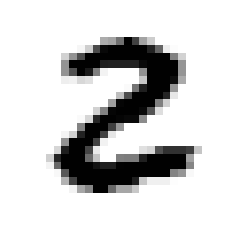

In [64]:
print_digit(X[25])

In [65]:
sgd_clf.predict([X[25]])

array([False])

## 4 Evaluation

### 4.1 Cross-Validation

In [107]:
from sklearn.model_selection import cross_val_score

try:
    # Check for pickled cross validation scores
    sgd_cross_val_score = pickle.load(open('pickles/sgd_cross_val_score.pkl', 'rb'))
except FileNotFoundError:
    # Create and pickle the scores if the file does not exist
    sgd_cross_val_score = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')
    pickle.dump(sgd_cross_val_score, open('pickles/sgd_cross_val_score.pkl', 'wb'))

sgd_cross_val_score

array([0.9644 , 0.96595, 0.952  ])

In [81]:
# Very basic classifier for comparison
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [83]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

Only ~10% of the dataset is 5, so even if this model guessed 'not 5' every time it would still be ~90% accurate. This demonstrates that accuracy is not a great performance metric for classifiers.

### 4.2 Confusion Matrix

Record of the number of times class A is classified as class B.

In [95]:
# Visualization: Two of ten 'not-5' are classified as '5'
pd.DataFrame(np.array([[8,2],[0,0]]), columns=['not-5','5'], index=['not-5','5'])

,not-5,5
not-5,8,2
5,0,0


In [109]:
# Generate some predictions from the y_train_5 set
from sklearn.model_selection import cross_val_predict

try:
    # Check for pickled predictions
    y_train_pred = pickle.load(open('pickles/y_train_pred.pkl', 'rb'))
except FileNotFoundError:
    # Create and pickle the predictions if the file does not exist
    y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
    pickle.dump(y_train_pred, open('pickles/y_train_pred.pkl', 'wb'))

In [110]:
# Generate a confusion matrix using the predictions
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53852,   727],
       [ 1626,  3795]], dtype=int64)

A perfect classifier would contain non-zero values only along the identity matrix.

In [97]:
# Generate a confusion matrix for a 'perfect' classifier
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)